import platform
print(platform.python_version())

In [1]:
#MEMASUKKAN PUSTAKA YANG DIBUTUHKAN
import scipy
import numpy
import matplotlib
import sklearn
import statsmodels
from pandas import read_csv
from pandas import datetime
from pandas import Series
from pandas import DataFrame
from matplotlib import pyplot


https://machinelearningmastery.com/time-series-forecast-study-python-monthly-sales-french-champagne/

In [2]:
#MEMBACA DATA MENTAH
series = read_csv('produksi-teh-indonesia.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
#MENAMPILKAN WUJUD DATA MENTAH SEBAGIAN AWAL
print(series.head())

Tahun-Bulan
2006-01-01    12011
2006-02-01    14252
2006-03-01    17008
2006-04-01    15256
2006-05-01    14593
Name: Jumlah Ton, dtype: int64


#MEMBUAT PLOT DATA MENTAH
series.plot()
pyplot.show()

#MEMBUAT HISTROGRAM DATA MENTAH, PENGECEKAN KURVA GAUSSIAN
series.hist()
pyplot.show()

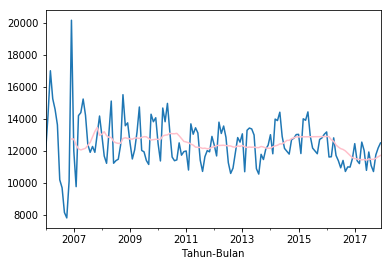

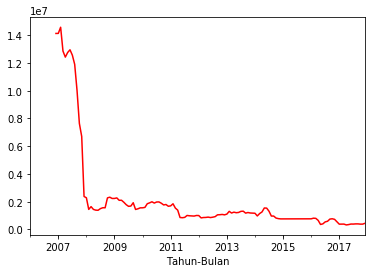

In [3]:
#MEMBUAT KURVA ROLLING-MEAN PER 12 BULAN
# Tail-rolling average transform
rolling = series.rolling(window=12)
rolling_mean = rolling.mean()
rolling_var = rolling.var()
rolling_std = rolling.std()
#print(rolling_mean.tail(12))
# plot original and transformed dataset
series.plot()
rolling_mean.plot(color='pink')
#rolling_var.plot(color='red')
pyplot.show()
#series.plot()
rolling_var.plot(color='red')
pyplot.show()
#series.plot()
#rolling_std.plot(color='green')
#pyplot.show()

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = rolling_mean(timeseries, window=12)
    rolstd = rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

test_stationarity(series)
https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

In [4]:
def mean_var_check(X):
    split = len(X) // 2
    X1, X2 = X[0:split], X[split:]
    mean1, mean2 = X1.mean(), X2.mean()
    print('mean1 = %f, mean2 = %f' % (mean1, mean2))
    if (mean1.round() == mean2.round()):
        print('%d = %d'%(mean1, mean2))
        print('Data has mean stationarity')
    else: 
        print('%d != %d'%(mean1, mean2))
        print('Data does not have mean stasionarity')
    print()
    var1, var2 = X1.var(), X2.var()
    print('variance1 = %f, variance2 = %f' % (var1, var2))
    if (var1.round() == var2.round()):
        print('%d = %d'%(var1, var2))
        print('Data has variance stasionarity')
    else: 
        print('%d != %d'%(var1, var2))
        print('Data does not have variance stasionarity') 
    print()

In [5]:
def adf_check(X):
    # PENGECEKAN STASIONERITAS DENGAN AUGMENTED-DICKY FULLER TEST
    from statsmodels.tsa.stattools import adfuller
    result = adfuller(X)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    print()
    #print (result[4]['5%'])
    if (result[0] < result[4]['5%']):
        print('ADF Statistic < Critical Value 5% --> Stationarity')
    else:
        print('ADF Statistic > Critical Value 5% --> None Stastionarity')
##https://machinelearningmastery.com/time-series-data-stationary-python/

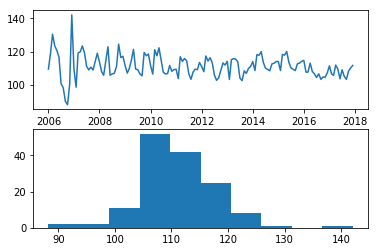

In [6]:
from matplotlib import pyplot
from numpy import sqrt
# sqrt transform
transform = series = sqrt(series)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(transform)
# histogram
pyplot.subplot(212)
pyplot.hist(transform)
pyplot.show()

In [7]:
X = series.values
mean_var_check(X)
adf_check(X)

mean1 = 112.220578, mean2 = 110.541093
112 != 110
Data does not have mean stasionarity

variance1 = 69.278011, variance2 = 20.027924
69 != 20
Data does not have variance stasionarity

ADF Statistic: -2.784090
p-value: 0.060583
Critical Values:
	1%: -3.482
	10%: -2.579
	5%: -2.884

ADF Statistic > Critical Value 5% --> None Stastionarity


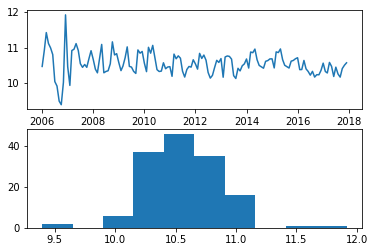

In [8]:
from pandas import Series
from pandas import DataFrame
from numpy import sqrt
from matplotlib import pyplot
dataframe = DataFrame(transform)
dataframe.columns = ['TeaQty']
dataframe['TeaQty'] = sqrt(dataframe['TeaQty'])
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['TeaQty'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['TeaQty'])
pyplot.show()

In [9]:
X = transform.values
mean_var_check(X)
adf_check(X)

mean1 = 112.220578, mean2 = 110.541093
112 != 110
Data does not have mean stasionarity

variance1 = 69.278011, variance2 = 20.027924
69 != 20
Data does not have variance stasionarity

ADF Statistic: -2.784090
p-value: 0.060583
Critical Values:
	1%: -3.482
	10%: -2.579
	5%: -2.884

ADF Statistic > Critical Value 5% --> None Stastionarity


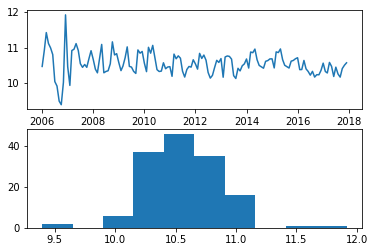

In [10]:
from matplotlib import pyplot
from numpy import sqrt
# sqrt transform
transform1 = sqrt(transform)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(transform1)
# histogram
pyplot.subplot(212)
pyplot.hist(transform1)
pyplot.show()

In [11]:
X = transform1.values
mean_var_check(X)
adf_check(X)

mean1 = 10.586131, mean2 = 10.511701
10 = 10
Data has mean stationarity

variance1 = 0.154419, variance2 = 0.045228
0 = 0
Data has variance stasionarity

ADF Statistic: -2.899335
p-value: 0.045425
Critical Values:
	1%: -3.482
	10%: -2.579
	5%: -2.884

ADF Statistic < Critical Value 5% --> Stationarity


#https://machinelearningmastery.com/power-transform-time-series-forecast-data-python/
#data fully stasioner, time to make corellogram

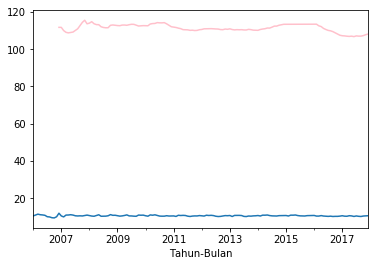

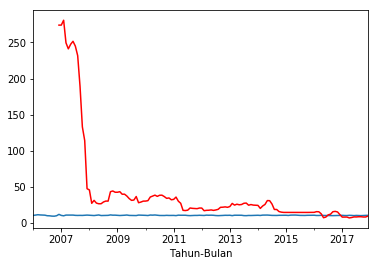

In [12]:
#MEMBUAT KURVA ROLLING-MEAN PER 12 BULAN
# Tail-rolling average transform
rolling = series.rolling(window=12)
rolling_mean = rolling.mean()
rolling_var = rolling.var()
#rolling_std = rolling.std()
#print(rolling_mean.tail(12))
# plot original and transformed dataset
transform1.plot()
rolling_mean.plot(color='pink')
#rolling_var.plot(color='red')
pyplot.show()
transform1.plot()
rolling_var.plot(color='red')
pyplot.show()
#transform1.plot()
#rolling_std.plot(color='green')
#pyplot.show()

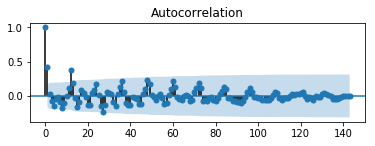

/home/nurul/.local/lib/python3.5/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


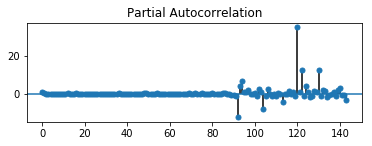

In [13]:
from pandas import Series
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure()
pyplot.subplot(211)
plot_acf(transform1, ax=pyplot.gca())
pyplot.show()
pyplot.subplot(212)
plot_pacf(transform1, ax=pyplot.gca())
pyplot.show()

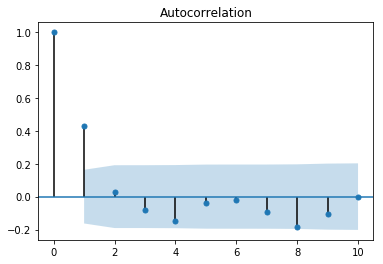

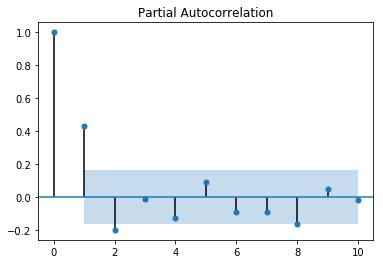

In [14]:
from pandas import Series
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import pyplot
plot_acf(transform1, lags=10)
pyplot.show()
plot_pacf(transform1, lags = 10)
pyplot.show()

from statsmodels.tsa.stattools import acf, pacf
import matplotlib
matplotlib.rc('xtick', labelsize=40) 
matplotlib.rc('ytick', labelsize=40) 

from numpy import linspace, random, exp
t = linspace(0, 10, 500)
#normal distributed values
ys = random.normal(0,5,500)
#exponential series to get the trend
ye = exp(t**0.5)
#adding normally distributed series in exponential series
y = ys+ye

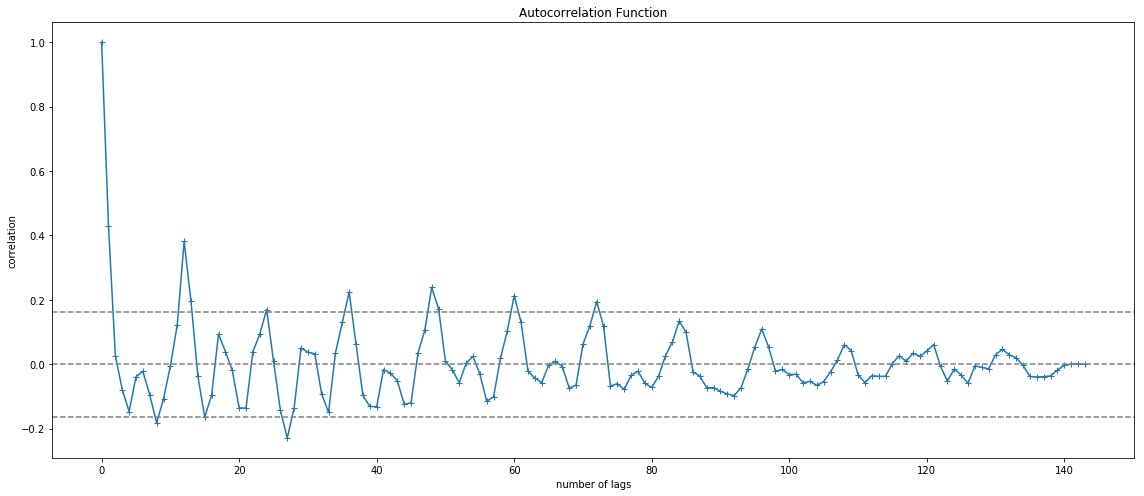

In [15]:
from statsmodels.tsa.stattools import acf, pacf 
#calling auto correlation function
lag_acf = acf(X, nlags=150)
#Plot PACF:
pyplot.figure(figsize=(16, 7))
pyplot.plot(lag_acf,marker='+')
pyplot.axhline(y=0,linestyle='--',color='gray')
pyplot.axhline(y=-1.96/sqrt(len(X)),linestyle='--',color='gray')
pyplot.axhline(y=1.96/sqrt(len(X)),linestyle='--',color='gray')
pyplot.title('Autocorrelation Function')
pyplot.xlabel('number of lags')
pyplot.ylabel('correlation')
pyplot.tight_layout()

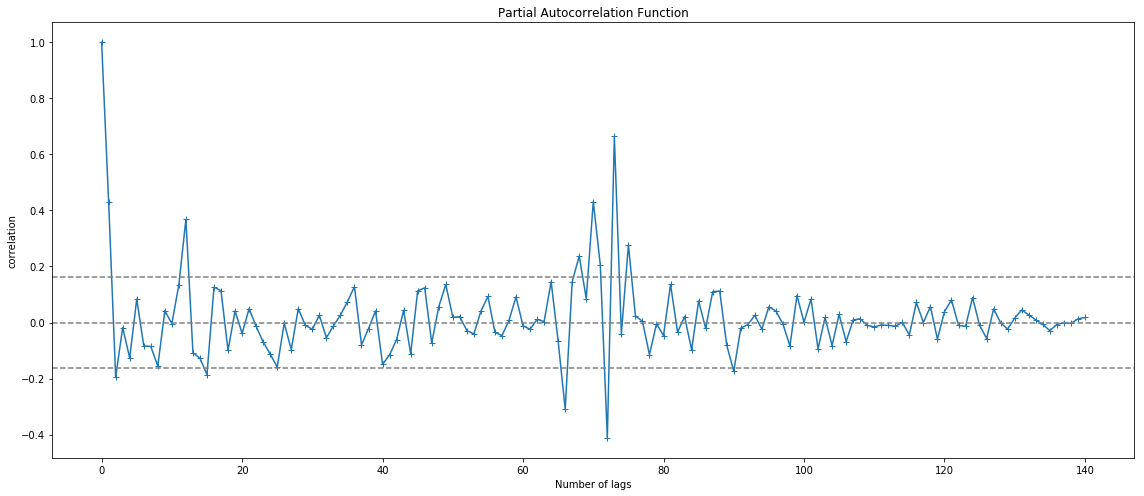

In [16]:
#calling partial correlation function
lag_pacf = pacf(X, nlags=140, method='ols')
#Plot PACF:
pyplot.figure(figsize=(16, 7))
pyplot.plot(lag_pacf,marker='+')
pyplot.axhline(y=0,linestyle='--',color='gray')
pyplot.axhline(y=-1.96/sqrt(len(X)),linestyle='--',color='gray')
pyplot.axhline(y=1.96/sqrt(len(X)),linestyle='--',color='gray')
pyplot.title('Partial Autocorrelation Function')
pyplot.xlabel('Number of lags')
pyplot.ylabel('correlation')
pyplot.tight_layout()

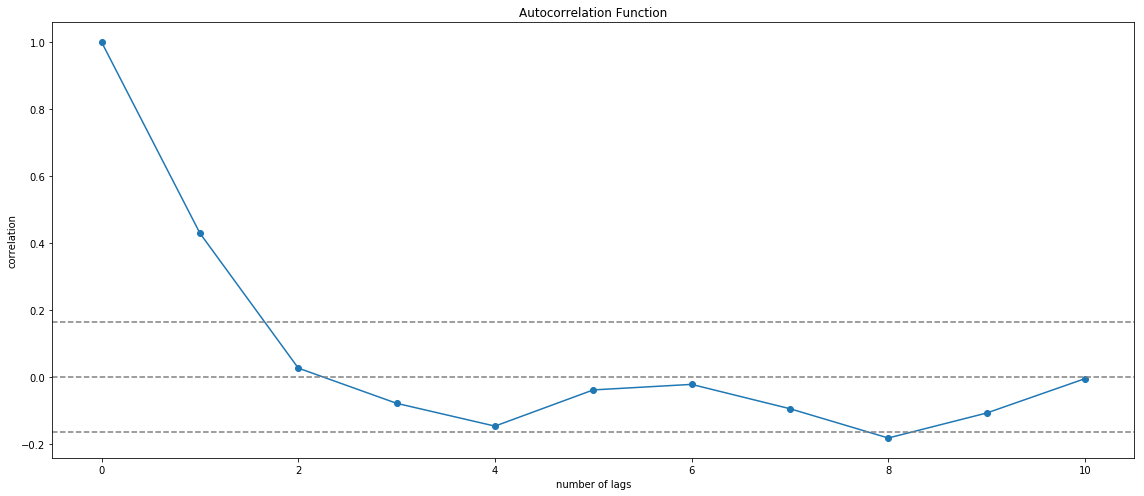

In [17]:
#calling acf function from stattools
lag_acf = acf(X, nlags=10)
pyplot.figure(figsize=(16, 7))
#Plot ACF: 
pyplot.plot(lag_acf, marker="o")
pyplot.axhline(y=0,linestyle='--',color='gray')
pyplot.axhline(y=-1.96/sqrt(len(X)),linestyle='--',color='gray')
pyplot.axhline(y=1.96/sqrt(len(X)),linestyle='--',color='gray')
pyplot.title('Autocorrelation Function')
pyplot.xlabel('number of lags')
pyplot.ylabel('correlation')
pyplot.tight_layout()

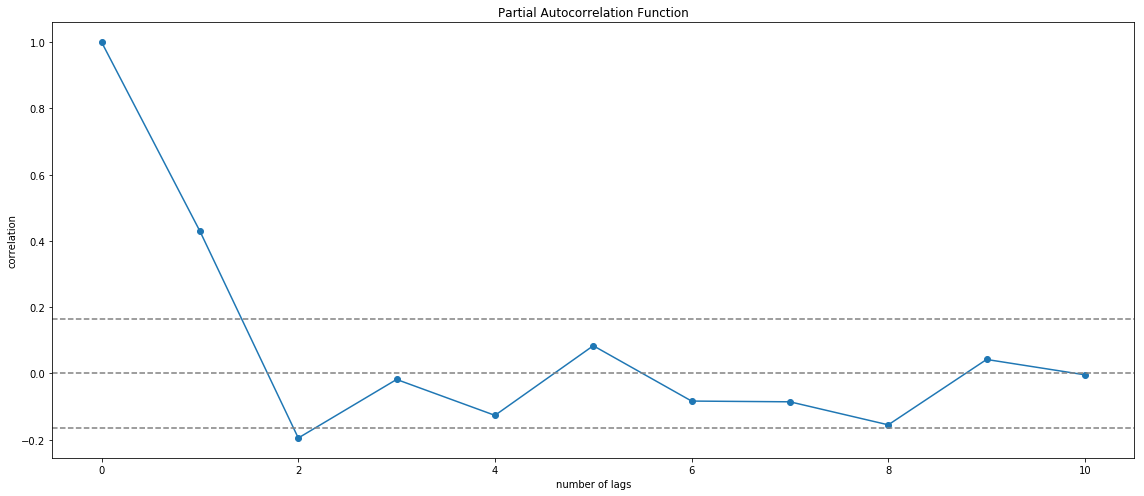

In [18]:
#calling pacf function from stattool
lag_pacf = pacf(X, nlags=10, method='ols')

#PLOT PACF
pyplot.figure(figsize=(16, 7))
pyplot.plot(lag_pacf, marker="o")
pyplot.axhline(y=0,linestyle='--',color='gray')
pyplot.axhline(y=-1.96/sqrt(len(X)),linestyle='--',color='gray')
pyplot.axhline(y=1.96/sqrt(len(X)),linestyle='--',color='gray')
pyplot.title('Partial Autocorrelation Function')
pyplot.xlabel('number of lags')
pyplot.ylabel('correlation')
pyplot.tight_layout()

In [19]:
#PENGECEKAN FORMASI PARAMETER ARIMA TERBAIK UNTUK PEMODELAN DATA MODIF
import warnings
#from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from math import exp
from math import log
import numpy

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = sqrt(evaluate_arima_model(dataset, order))
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order, rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

# load dataset
def parser(x):
	return datetime.strptime(x, '%Y-%m')
# evaluate parameters
p_values = range(0, 2)
d_values = range(0, 2)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(transform1.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=0.212
ARIMA(0, 0, 1) RMSE=0.181
ARIMA(0, 0, 2) RMSE=0.183
ARIMA(0, 1, 0) RMSE=0.185
ARIMA(0, 1, 1) RMSE=0.204
ARIMA(0, 1, 2) RMSE=0.178
ARIMA(1, 0, 0) RMSE=0.172
ARIMA(1, 0, 1) RMSE=0.183
ARIMA(1, 0, 2) RMSE=0.182
ARIMA(1, 1, 0) RMSE=0.180
ARIMA(1, 1, 2) RMSE=0.180
Best ARIMA(1, 0, 0) RMSE=0.172


#!! https://machinelearningmastery.com/time-series-forecast-study-python-monthly-sales-french-champagne/ 

predicted=10.534915, expected=10.540781
predicted=10.555560, expected=10.678516
predicted=10.610817, expected=10.424012
predicted=10.509388, expected=10.873881
predicted=10.687401, expected=10.855557
predicted=10.683143, expected=10.956543
predicted=10.727566, expected=10.656480
predicted=10.607758, expected=10.497610
predicted=10.544098, expected=10.459585
predicted=10.528259, expected=10.419595
predicted=10.511313, expected=10.613248
predicted=10.588766, expected=10.633474
predicted=10.597160, expected=10.680158
predicted=10.616368, expected=10.682825
predicted=10.618084, expected=10.427321
predicted=10.515612, expected=10.877573
predicted=10.694856, expected=10.859073
predicted=10.690160, expected=10.960152
predicted=10.734450, expected=10.660609
predicted=10.614113, expected=10.501930
predicted=10.550202, expected=10.463734
predicted=10.534256, expected=10.424674
predicted=10.517666, expected=10.616592
predicted=10.594832, expected=10.637630
predicted=10.603544, expected=10.684055


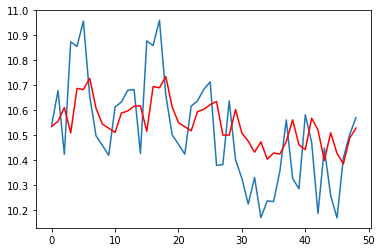

In [20]:
#from pandas import read_csv
#from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from math import exp
from math import log
import numpy

def parser(x):
	return datetime.strptime(x, '%Y-%m')

X = transform1.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(1,0,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
rmse = sqrt(error)
print('Test RMSE: %.3f' % rmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

#from pandas import read_csv
#from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from math import exp
from math import log
import numpy

def parser(x):
	return datetime.strptime(x, '%Y-%m')

X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(1,0,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
rmse = sqrt(error)
print('Test RMSE: %.3f' % rmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

https://machinelearningmastery.com/feature-selection-time-series-forecasting-python/